# Data exploration
 En este archivo se realiza toda la exploración y análisis de las bases de datos seleccionadas para el proyecto.

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

## Data exploration process

#### Cargue de los datasets

In [2]:
from data_quality import cargue_datasets
casos, edu_vial2018, encuesta_calidad, encuesta_cultura, hurto_tp, lesion_nf, mede_victimas, traffic, compar = cargue_datasets()

c:\Users\Asus\OneDrive - Universidad de la Sabana\Universidad\Octavo Semestre\Proyecto de Analítica\Proyecto_analitica_aplicada\data_quality.py:22: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mede_victimas=pd.read_csv(mede_victimas_ruta, delimiter=";", encoding="utf-8")
c:\Users\Asus\OneDrive - Universidad de la Sabana\Universidad\Octavo Semestre\Proyecto de Analítica\Proyecto_analitica_aplicada\data_quality.py:24: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  compar=pd.read_csv(compar_ruta, delimiter=";", encoding="utf-8")


### Análisis de casos de delitos

In [3]:
# Tratamiento del dataset
from data_quality import casos_treatment
casos=casos_treatment(casos)

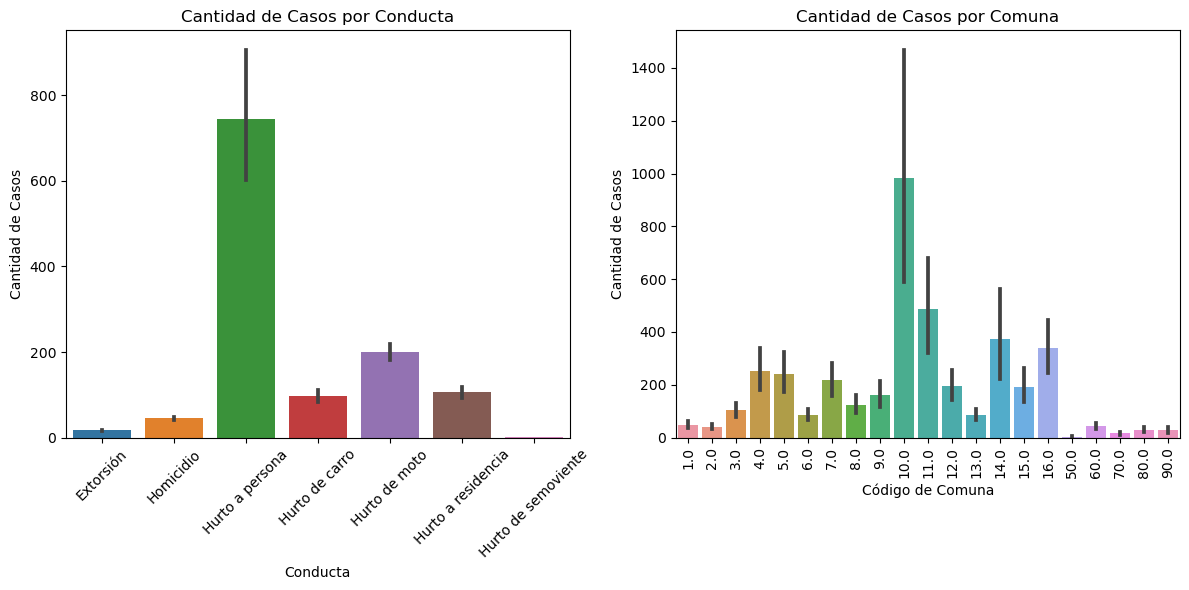

In [4]:
# figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras: Cantidad de casos por conducta
sns.barplot(x='Conducta', y='Cantidad_casos', data=casos, ax=axes[0])
axes[0].set_title('Cantidad de Casos por Conducta')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Conducta')
axes[0].set_ylabel('Cantidad de Casos')

# Gráfico de barras: Cantidad de casos por comuna
sns.barplot(x='Comuna', y='Cantidad_casos', data=casos, ax=axes[1])
axes[1].set_title('Cantidad de Casos por Comuna')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Código de Comuna')
axes[1].set_ylabel('Cantidad de Casos')

plt.tight_layout()
plt.show()


### Análisis de eduación vial 2018

In [5]:
from data_quality import edu_vial2018_treatment
edu_vial2018=edu_vial2018_treatment(edu_vial2018)

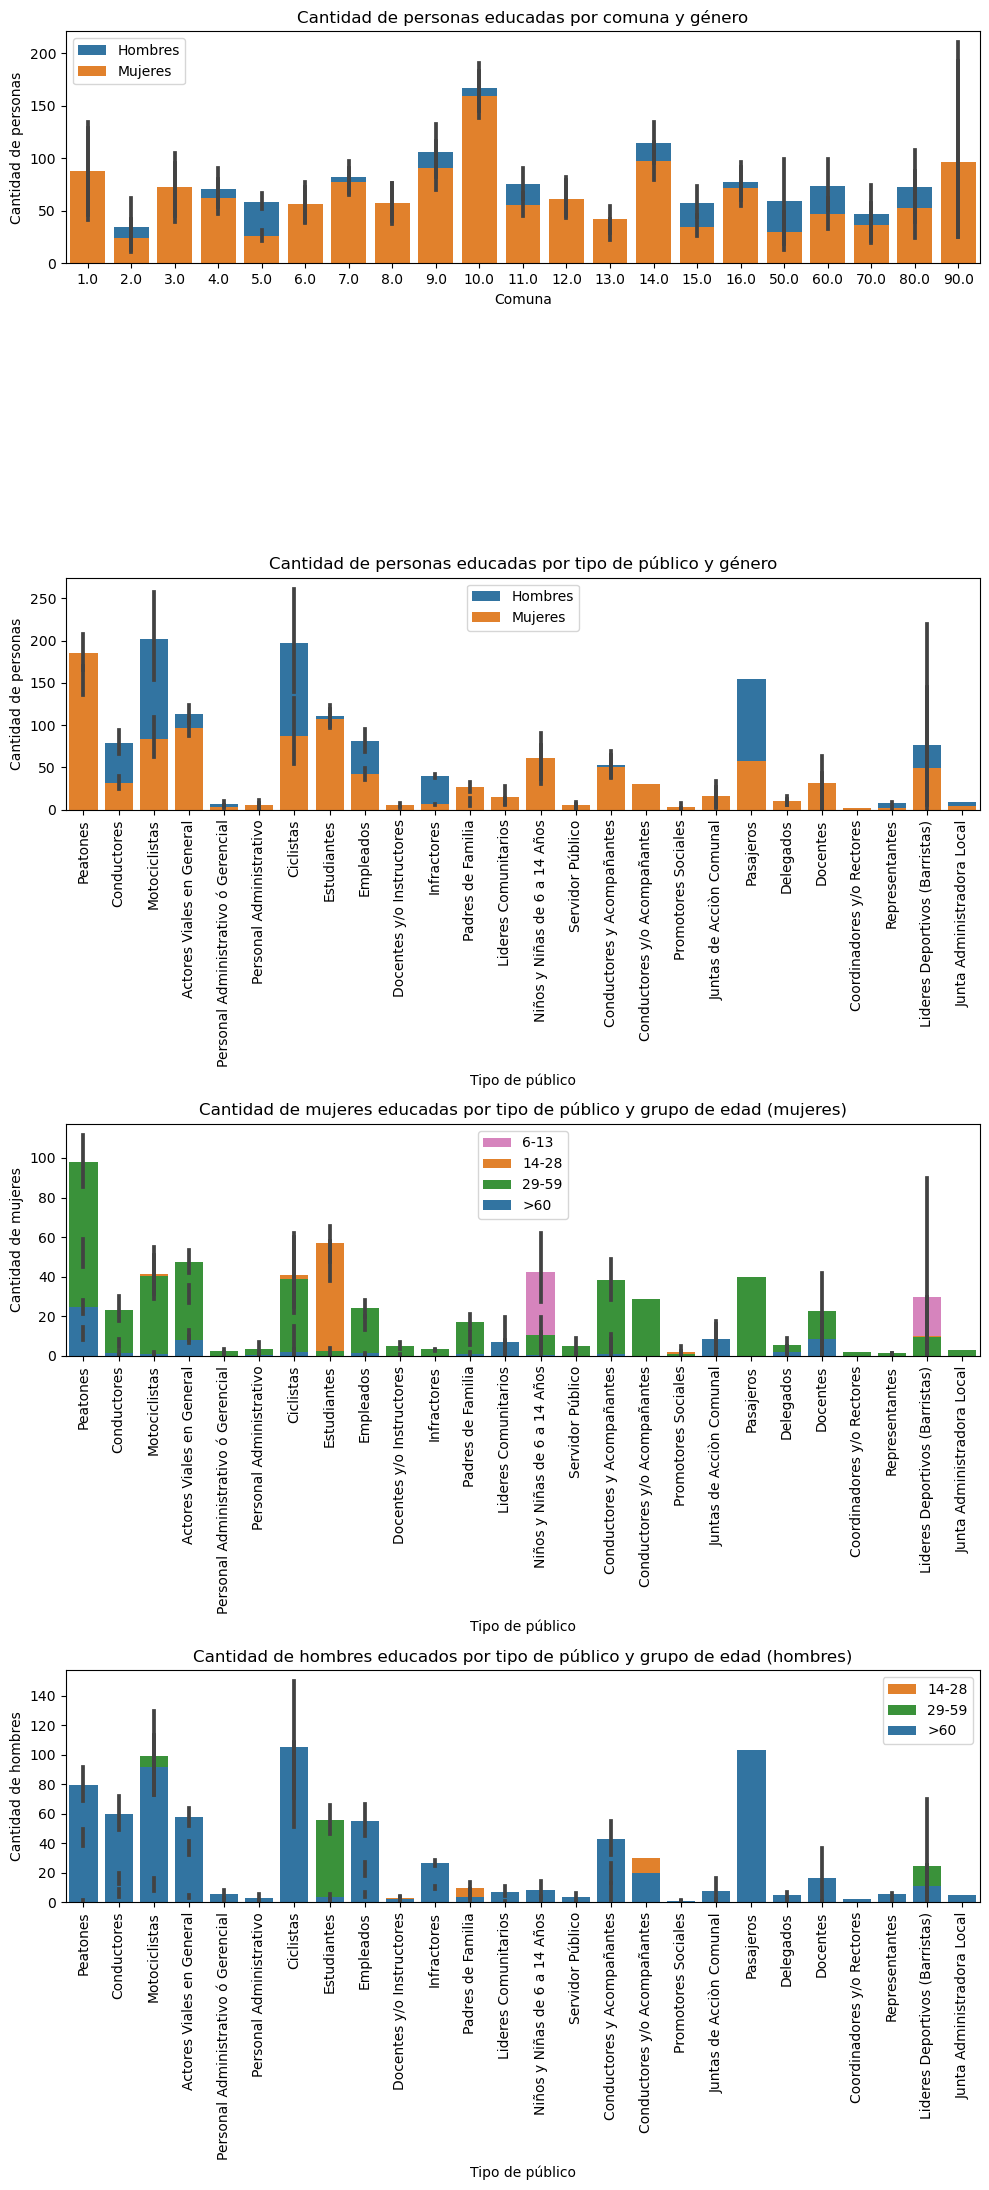

In [6]:
# Figura con tres subplots (4 filas, 1 columna)
fig, axes = plt.subplots(4, 1, figsize=(10, 22))

#Gráfico de barras: Cantidad de personas por comuna y por género
sns.barplot(x='Comuna', y='N_hombres', data=edu_vial2018, color='tab:blue', label='Hombres', ax=axes[0])
sns.barplot(x='Comuna', y='N_mujeres', data=edu_vial2018, color='tab:orange', label='Mujeres', ax=axes[0])
axes[0].set_title('Cantidad de personas educadas por comuna y género')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_xlabel('Comuna')
axes[0].set_ylabel('Cantidad de personas')
axes[0].legend()

# Gráfico de barras: Cantidad de personas educadas por tipo de público y género
sns.barplot(x='Publico', y='N_hombres', data=edu_vial2018, color='tab:blue', label='Hombres', ax=axes[1])
sns.barplot(x='Publico', y='N_mujeres', data=edu_vial2018, color='tab:orange', label='Mujeres', ax=axes[1])
axes[1].set_title('Cantidad de personas educadas por tipo de público y género')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Tipo de público')
axes[1].set_ylabel('Cantidad de personas')
axes[1].legend()

# Gráfico de rangos de edad para mujeres
sns.barplot(x='Publico', y='N_mujeres (6-13)', data=edu_vial2018, color='tab:pink', label='6-13', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (14-28)', data=edu_vial2018, color='tab:orange', label='14-28', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (29-59)', data=edu_vial2018, color='tab:green', label='29-59', ax=axes[2])
sns.barplot(x='Publico', y='N_mujeres (>60)', data=edu_vial2018, color='tab:blue', label='>60', ax=axes[2])
axes[2].set_title('Cantidad de mujeres educadas por tipo de público y grupo de edad (mujeres)')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_xlabel('Tipo de público')
axes[2].set_ylabel('Cantidad de mujeres')
axes[2].legend()

# Gráfico de rangos de edad para hombres
sns.barplot(x='Publico', y='N_hombres (14-28)', data=edu_vial2018, color='tab:orange', label='14-28', ax=axes[3])
sns.barplot(x='Publico', y='N_hombres (29-59)', data=edu_vial2018, color='tab:green', label='29-59', ax=axes[3])
sns.barplot(x='Publico', y='N_hombres (>60)', data=edu_vial2018, color='tab:blue', label='>60', ax=axes[3])
axes[3].set_title('Cantidad de hombres educados por tipo de público y grupo de edad (hombres)')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)
axes[3].set_xlabel('Tipo de público')
axes[3].set_ylabel('Cantidad de hombres')
axes[3].legend()

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


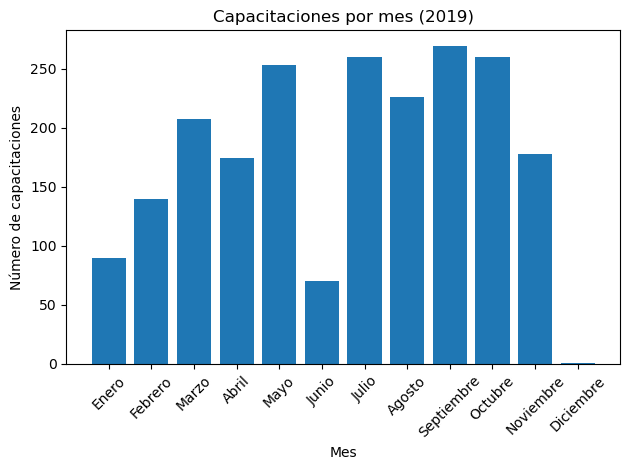

In [7]:
# Capacitaciones por mes
df=edu_vial2018
df['mes'] = edu_vial2018['Fecha'].dt.month
datos_por_mes = df['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.bar(datos_por_mes.index, datos_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de capacitaciones')
plt.title('Capacitaciones por mes (2019)')
plt.xticks(datos_por_mes.index, labels=nombres_meses, rotation=45)
plt.tight_layout()
plt.show()

### Comparendos

In [8]:
from data_quality import compar_treatment
compar=compar_treatment(compar)

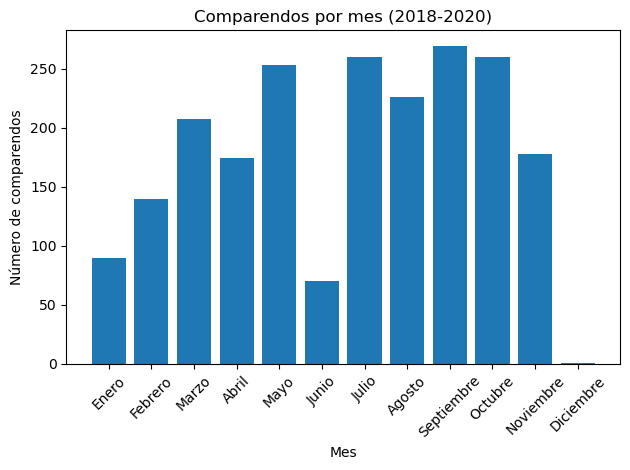

In [9]:
#Comparendos por mes
df=compar
df['mes'] = edu_vial2018['Fecha'].dt.month
datos_por_mes = df['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.bar(datos_por_mes.index, datos_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de comparendos')
plt.title('Comparendos por mes (2018-2020)')
plt.xticks(datos_por_mes.index, labels=nombres_meses, rotation=45)
plt.tight_layout()
plt.show()


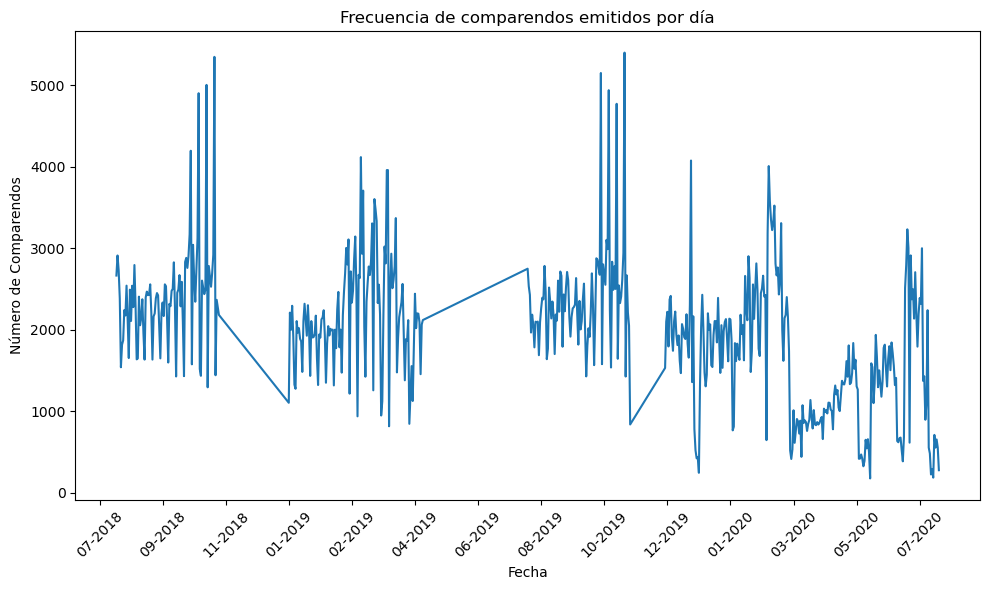

In [10]:
daily_counts = compar['Fecha'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

plt.plot(daily_counts.index, daily_counts.values)
plt.title('Frecuencia de comparendos emitidos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de Comparendos')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Hurto en transporte público 

In [11]:
from data_quality import hurto_tp_treatment
hurto_tp=hurto_tp_treatment(hurto_tp)

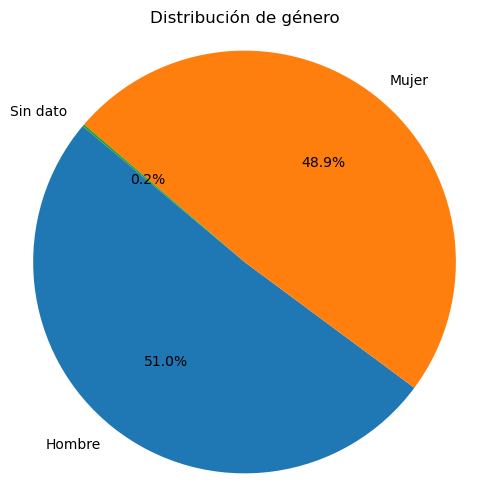

<Figure size 800x500 with 0 Axes>

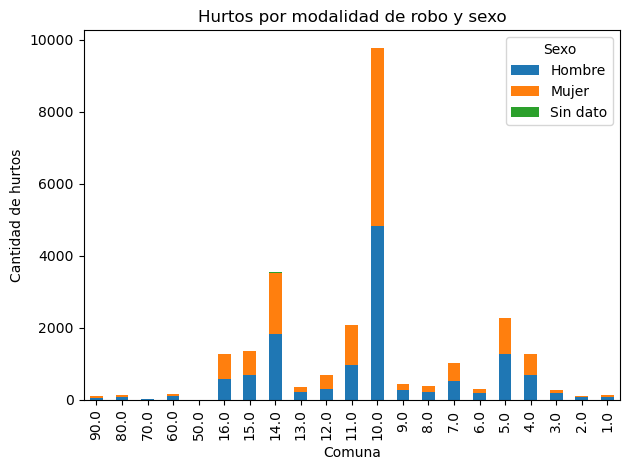

<Figure size 800x600 with 0 Axes>

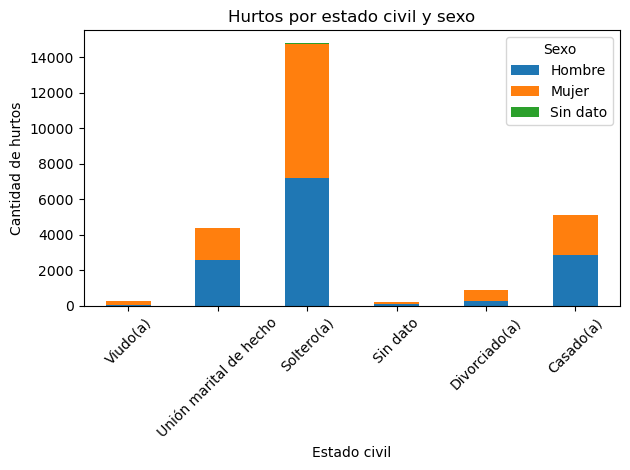

<Figure size 800x500 with 0 Axes>

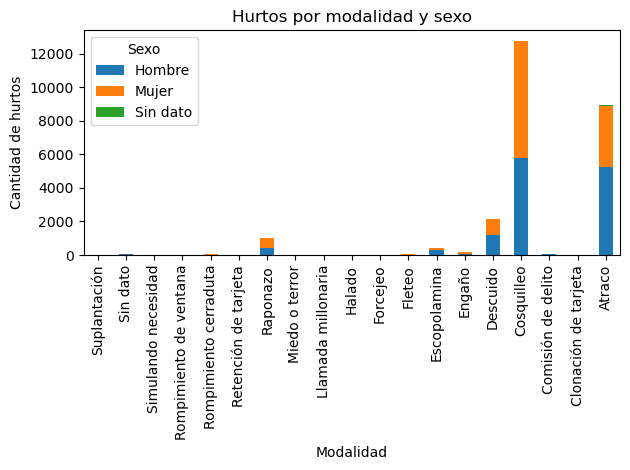

<Figure size 800x500 with 0 Axes>

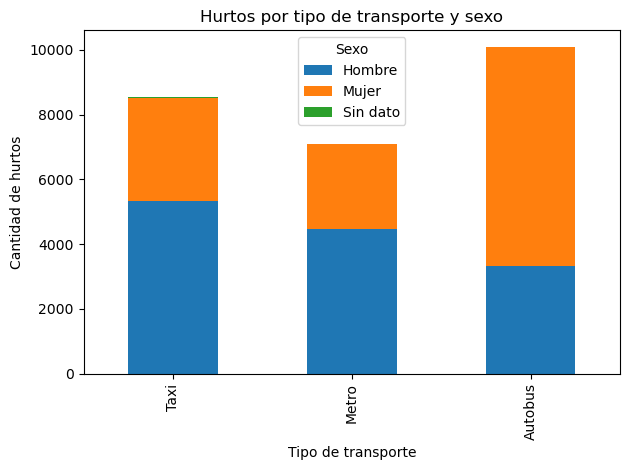

<Figure size 1000x600 with 0 Axes>

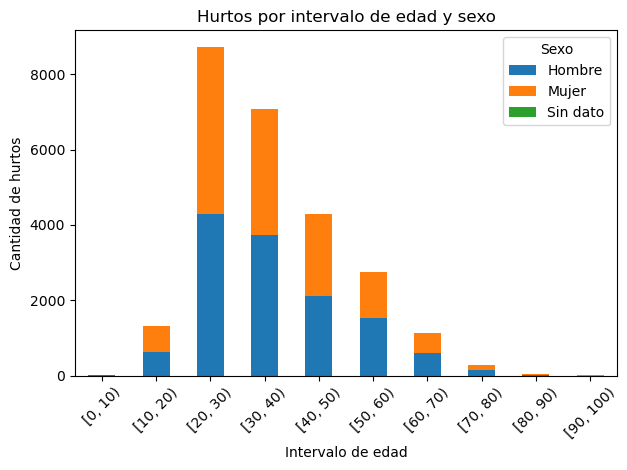

In [12]:
#Gráfico de torta: Proporción de sexos en el dataset
cantidad_por_sexo = hurto_tp['Sexo'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cantidad_por_sexo, labels=cantidad_por_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de género')
plt.axis('equal')
plt.show()

#Gráfica de barras: Hurtos por comuna y sexo
robos_por_comuna_sexo = hurto_tp.groupby(['Comuna', 'Sexo']).size().unstack()
robos_por_comuna_sexo = robos_por_comuna_sexo.sort_values(by='Comuna', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_comuna_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por modalidad de robo y sexo')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfico de barras apiladas: hurto por estado civil y sexo
robos_por_estado_sexo = hurto_tp.groupby(['Estado_civil', 'Sexo']).size().unstack()
robos_por_estado_sexo = robos_por_estado_sexo.sort_values(by='Estado_civil', ascending=False)
plt.figure(figsize=(8, 6))
robos_por_estado_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por estado civil y sexo')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=45)
plt.tight_layout()

#Gráfico de barras: hurto por modalidad
robos_por_moda_sexo = hurto_tp.groupby(['Modalidad', 'Sexo']).size().unstack()
robos_por_moda_sexo = robos_por_moda_sexo.sort_values(by='Modalidad', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_moda_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por modalidad y sexo')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfica de barras: Hurtos por medio de transporte y sexo
robos_por_trans_sexo = hurto_tp.groupby(['Transporte', 'Sexo']).size().unstack()
robos_por_trans_sexo = robos_por_trans_sexo.sort_values(by='Transporte', ascending=False)
plt.figure(figsize=(8, 5))
robos_por_trans_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por tipo de transporte y sexo')
plt.xlabel('Tipo de transporte')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=90)
plt.tight_layout()

#Gráfica de barras: Hurtos por edad
edades_intervalos = pd.cut(hurto_tp['Edad'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
hurto_tp['Edad_intervalo'] = edades_intervalos
robos_por_edad_sexo = hurto_tp.groupby(['Edad_intervalo', 'Sexo']).size().unstack()
plt.figure(figsize=(10, 6))
robos_por_edad_sexo.plot(kind='bar', stacked=True)
plt.title('Hurtos por intervalo de edad y sexo')
plt.xlabel('Intervalo de edad')
plt.ylabel('Cantidad de hurtos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
hurto_tp

,Fecha,Sexo,Edad,Estado_civil,Transporte,Modalidad,Conducta,Comuna,Lugar,Bien,Edad_intervalo
0,2017-01-01,Hombre,37,Casado(a),Taxi,Atraco,De celular,4.0,Vía pública,Celular,"[30, 40)"
1,2017-01-01,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,16.0,Vía pública,Elementos escolares,"[20, 30)"
2,2017-01-01,Mujer,29,Unión marital de hecho,Taxi,Descuido,No,16.0,Vía pública,Computador,"[20, 30)"
3,2017-01-02,Hombre,36,Casado(a),Taxi,Atraco,A taxista,8.0,Vía pública,Peso,"[30, 40)"
4,2017-01-02,Hombre,36,Casado(a),Taxi,Atraco,A taxista,8.0,Vía pública,Celular,"[30, 40)"
...,...,...,...,...,...,...,...,...,...,...,...
25731,2021-12-31,Hombre,35,Soltero(a),Metro,Cosquilleo,Sin dato,10.0,Estación del Metro,Celular,"[30, 40)"
25732,2021-12-31,Mujer,26,Soltero(a),Metro,Cosquilleo,Sin dato,10.0,Estación del Metro,Celular,"[20, 30)"
25733,2021-12-31,Hombre,25,Soltero(a),Taxi,Atraco,Sin dato,4.0,Bar o cantina,Celular,"[20, 30)"
25734,2021-12-31,Hombre,25,Soltero(a),Metro,Cosquilleo,Sin dato,14.0,Estación del Metro,Celular,"[20, 30)"


### Victimas de Incidentes Viales en Medellín

In [14]:
from data_quality import medevic_treatment
mede_victimas=medevic_treatment(mede_victimas)

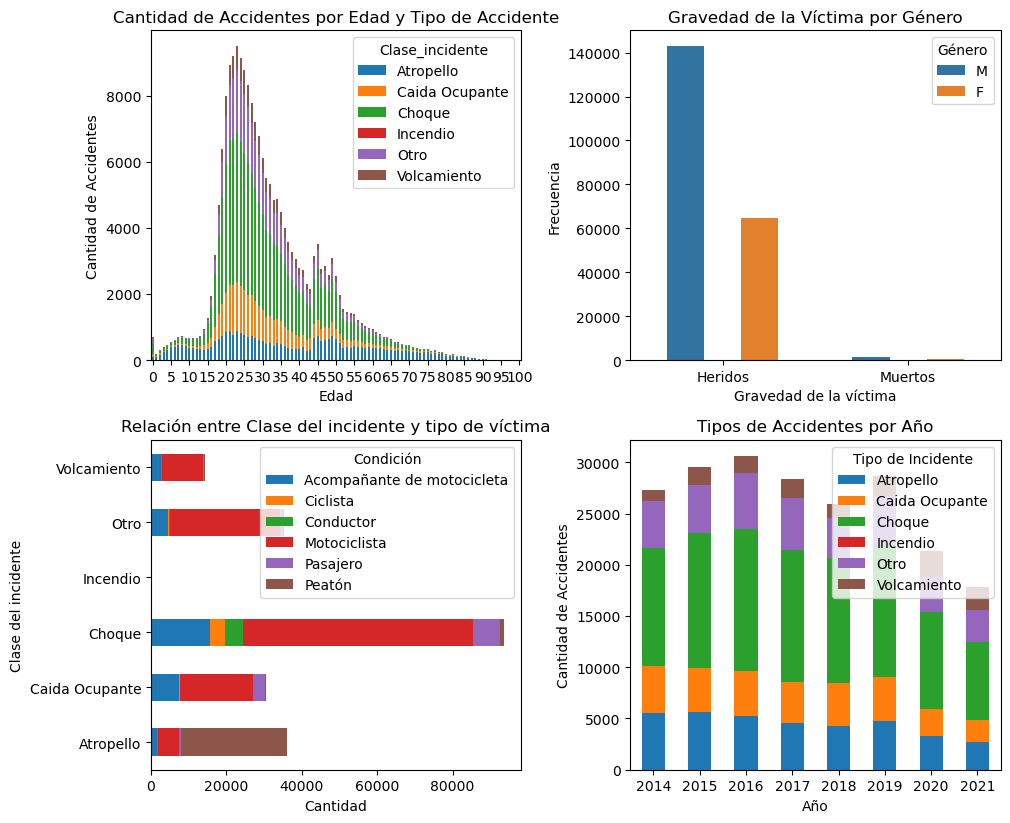

In [27]:
from matplotlib.gridspec import GridSpec

# Crear la cuadrícula de subplots con 3 filas y 1 columna
gs = GridSpec(3, 3)

# Crear la figura y los subplots usando la cuadrícula
fig = plt.figure(figsize=(15, 12))

# Subplot 1: Gráfico de frecuencia y tipo de accidente por edad
ax1 = fig.add_subplot(gs[0, 0])
# Agrupar por edad y tipo de accidente, y contar las ocurrencias
grouped = mede_victimas.groupby(['Edad', 'Clase_incidente']).size().unstack()
# Crear una barra para cada tipo de accidente
ax1 = grouped.plot(kind='bar', stacked=True,ax=ax1)
ax1.set_title('Cantidad de Accidentes por Edad y Tipo de Accidente')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Cantidad de Accidentes')
ax1.set_xticks(range(0, len(grouped.index), 5), grouped.index[::5], rotation=0)


# Subplot 2: Relación entre gravedad de la víctima y género
ax2 = fig.add_subplot(gs[0, 1])
plot = sns.countplot(x='Gravedad_victima', hue='Sexo', data=mede_victimas, ax=ax2)
ax2.set_xlabel('Gravedad de la víctima')
ax2.set_ylabel('Frecuencia')
total_bars = len(plot.patches)
width = 0.1 if len(mede_victimas['Gravedad_victima'].unique()) > 2 else 0.2
for bar in plot.patches:
    current_width = bar.get_width()
    diff = current_width - width
    bar.set_width(width)
    bar.set_x(bar.get_x() + diff * 0.5)
ax2.set_ylim(0, ax2.get_ylim()[1])
ax2.set_title('Gravedad de la Víctima por Género')
ax2.legend(title='Género')

# Subplot 3: Gráfico de barras agrupadas horizontal
ax3 = fig.add_subplot(gs[1, 0])
pivot_data = incident_condition_counts.pivot(index='Clase_incidente', columns='Condicion', values='Cantidad')
pivot_data.plot(kind='barh', stacked=True, ax=ax3)
ax3.set_xlabel('Cantidad')
ax3.set_ylabel('Clase del incidente')
ax3.set_title('Relación entre Clase del incidente y tipo de víctima')
ax3.legend(title='Condición')

#Subplot 4
ax4 = fig.add_subplot(gs[1, 1])
grouped = mede_victimas.groupby(['Año', 'Clase_incidente']).size().unstack(fill_value=0)
# Crear un gráfico de barras apiladas
ax4 = grouped.plot(kind='bar', stacked=True, ax=ax4)
ax4.set_ylabel('Cantidad de Accidentes')
ax4.set_xlabel('Año')
ax4.set_title('Tipos de Accidentes por Año')
ax4.legend(title='Tipo de Incidente')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)


# Ajustar el espacio entre los subplots y mostrar la figura
plt.tight_layout()
plt.show()
